In [1]:
import pandas as pd

# Load the dataset to inspect its structure and contents
file_path = "C:\\Users\\kiran\\Desktop\\infosys Intern\\Featured_dataset.csv"
data = pd.read_csv(file_path)

data_info = data.info()
data_head = data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Longitude         14249 non-null  float64
 1   Latitude          14249 non-null  float64
 2   Speed             14249 non-null  float64
 3   Distance          14249 non-null  float64
 4   Time              14249 non-null  object 
 5   Acc X             14249 non-null  float64
 6   Acc Y             14249 non-null  float64
 7   Acc Z             14249 non-null  float64
 8   Heading           14249 non-null  float64
 9   gyro_x            14249 non-null  float64
 10  gyro_y            14249 non-null  float64
 11  gyro_z            14249 non-null  float64
 12  label             14249 non-null  int64  
 13  Acc_Magnitude     14249 non-null  float64
 14  Acc_Change        14249 non-null  float64
 15  Gyro_Magnitude    14249 non-null  float64
 16  Gyro_Change       14249 non-null  float6

In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import KFold
import numpy as np

# Assuming 'data' is your dataset DataFrame
# Replace 'feature_columns' with your actual feature columns
feature_columns = ['Acc X', 'gyro_x', 'gyro_y', 'gyro_z', 'Acc Y', 'Acc Z']
X = data[feature_columns].values

# Define parameters for cross-validation
fold_sizes = [5, 10, 15]  # Different fold sizes to test
contamination_rates = [0.01, 0.05, 0.1, 0.15]  # Different contamination rates to test

# Initialize results storage
results = {
    'Model': [],
    'Fold Size': [],
    'Fold': [],
    'Contamination Rate': [],
    'Mean Anomaly Score': [],
    'Anomalies Detected': []
}

# Function to evaluate a model using K-Fold Cross-Validation
def cross_validate_model(model, model_name, fold_size, contamination_rate):
    kf = KFold(n_splits=fold_size)
    fold_num = 1

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]

        # Fit the model on the training set
        if model_name == 'LOF':
            model.fit(X_train)  # LOF fit for novelty detection
            anomaly_scores = model.decision_function(X_test)  # Obtain anomaly scores
            anomalies = model.predict(X_test)  # Obtain anomaly predictions
        else:
            model.fit(X_train)
            anomaly_scores = model.decision_function(X_test)
            anomalies = model.predict(X_test)

        # Calculate metrics for this fold
        mean_anomaly_score = np.mean(anomaly_scores)
        anomalies_detected = sum(anomalies == -1)

        # Store results
        results['Model'].append(model_name)
        results['Fold Size'].append(fold_size)
        results['Fold'].append(fold_num)
        results['Contamination Rate'].append(contamination_rate)
        results['Mean Anomaly Score'].append(mean_anomaly_score)
        results['Anomalies Detected'].append(anomalies_detected)

        # Move to next fold
        fold_num += 1

# Run cross-validation on Isolation Forest and LOF with varying contamination rates and fold sizes
for contamination_rate in contamination_rates:
    for fold_size in fold_sizes:
        # Isolation Forest model
        iso_forest = IsolationForest(contamination=contamination_rate, n_estimators=100, random_state=42)
        cross_validate_model(iso_forest, 'IsolationForest', fold_size, contamination_rate)

        # Local Outlier Factor model
        lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination_rate, novelty=True)
        cross_validate_model(lof, 'LOF', fold_size, contamination_rate)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

               Model  Fold Size  Fold  Contamination Rate  Mean Anomaly Score  \
0    IsolationForest          5     1                0.01            0.254786   
1    IsolationForest          5     2                0.01            0.220598   
2    IsolationForest          5     3                0.01            0.261454   
3    IsolationForest          5     4                0.01            0.253319   
4    IsolationForest          5     5                0.01            0.240463   
..               ...        ...   ...                 ...                 ...   
235              LOF         15    11                0.15            0.059753   
236              LOF         15    12                0.15            0.050594   
237              LOF         15    13                0.15            0.036426   
238              LOF         15    14                0.15            0.086203   
239              LOF         15    15                0.15            0.021910   

     Anomalies Detected  
0

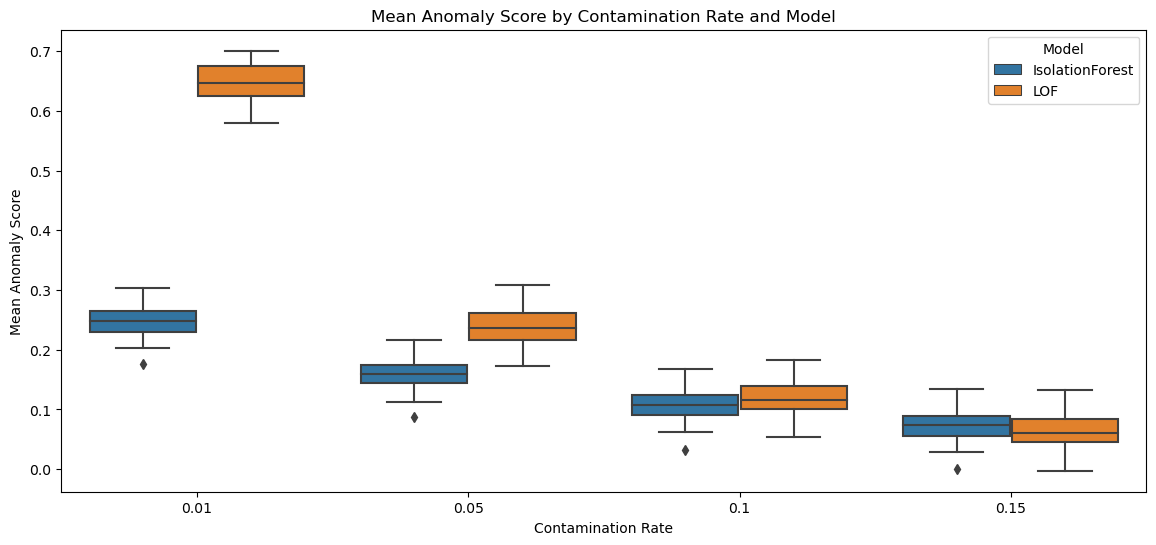

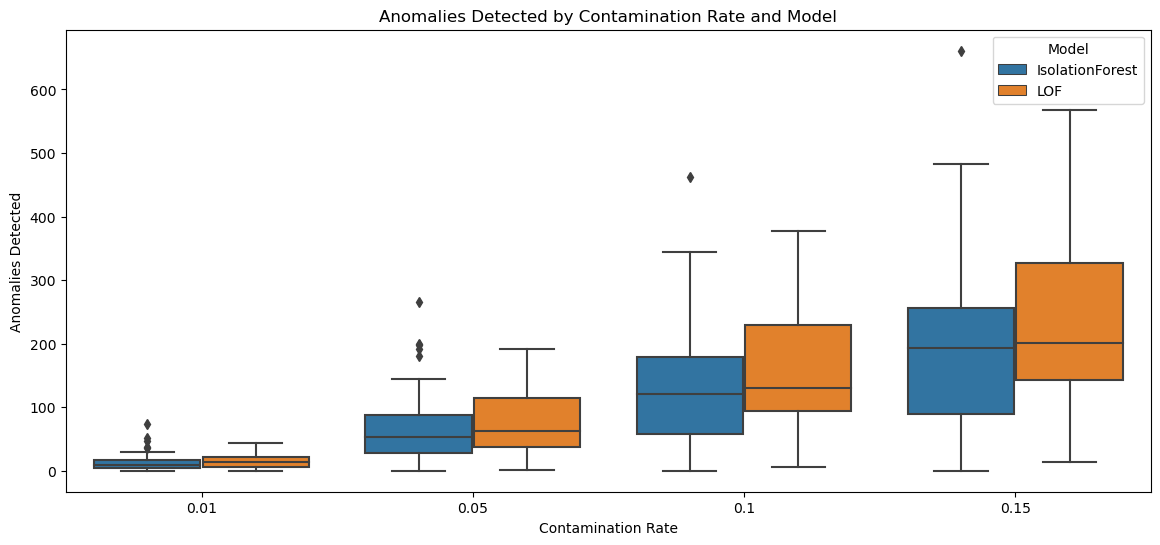

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Mean Anomaly Score by Contamination Rate, Fold Size, and Model
plt.figure(figsize=(14, 6))
sns.boxplot(data=results_df, x='Contamination Rate', y='Mean Anomaly Score', hue='Model')
plt.title('Mean Anomaly Score by Contamination Rate and Model')
plt.ylabel('Mean Anomaly Score')
plt.xlabel('Contamination Rate')
plt.legend(title='Model')
plt.show()

# Plot Anomalies Detected by Contamination Rate, Fold Size, and Model
plt.figure(figsize=(14, 6))
sns.boxplot(data=results_df, x='Contamination Rate', y='Anomalies Detected', hue='Model')
plt.title('Anomalies Detected by Contamination Rate and Model')
plt.ylabel('Anomalies Detected')
plt.xlabel('Contamination Rate')
plt.legend(title='Model')
plt.show()

,Model,Contamination Rate,Fold Size,Fold,Mean Anomaly Score,Anomalies Detected
0,IsolationForest,0.01,5,1,0.254786,17
1,IsolationForest,0.01,5,2,0.220598,74
2,IsolationForest,0.01,5,3,0.261454,10
3,IsolationForest,0.01,5,4,0.253319,36
4,IsolationForest,0.01,5,5,0.240463,30
...,...,...,...,...,...,...
175,LOF,0.10,15,11,0.114635,109
176,LOF,0.10,15,12,0.104879,128
177,LOF,0.10,15,13,0.087483,124
178,LOF,0.10,15,14,0.143691,60


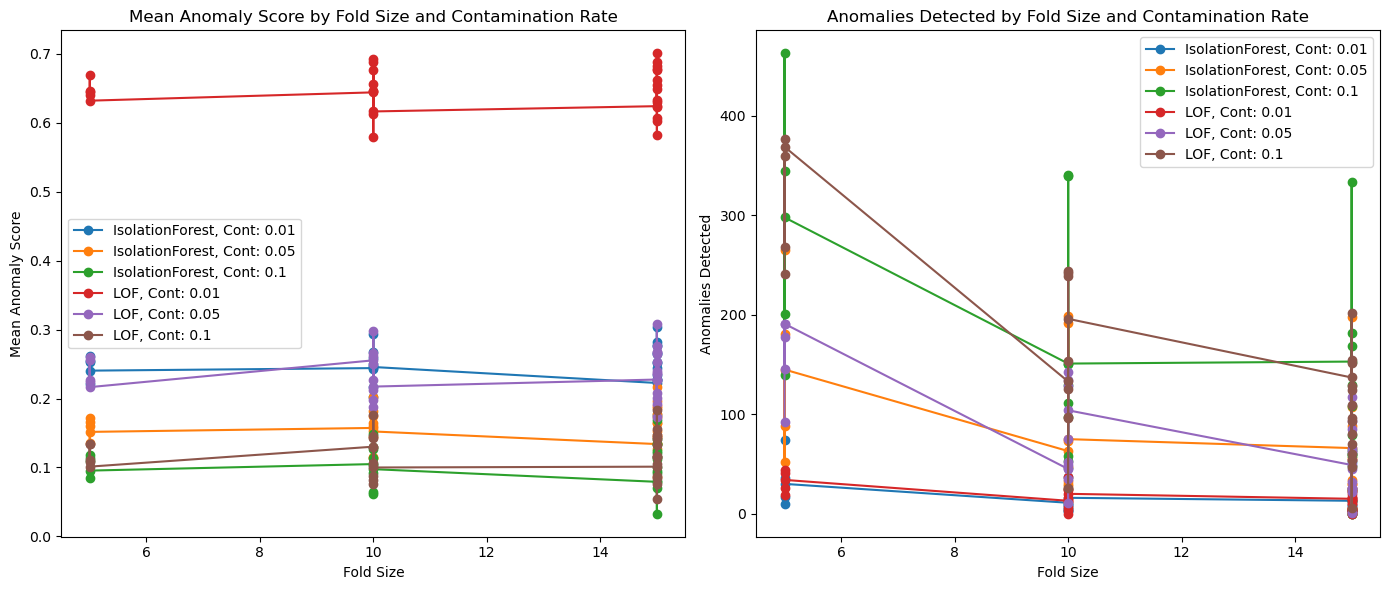

Mean Anomaly Scores Summary:
              Model  Contamination Rate  Fold Size  Mean Anomaly Score
0   IsolationForest                0.01          5            0.246124
1   IsolationForest                0.01         10            0.246899
2   IsolationForest                0.01         15            0.248944
3   IsolationForest                0.05          5            0.156967
4   IsolationForest                0.05         10            0.156654
5   IsolationForest                0.05         15            0.159633
6   IsolationForest                0.10          5            0.104556
7   IsolationForest                0.10         10            0.104320
8   IsolationForest                0.10         15            0.106705
9               LOF                0.01          5            0.646462
10              LOF                0.01         10            0.645834
11              LOF                0.01         15            0.646195
12              LOF                0.05         

In [4]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define feature columns and dataset
feature_columns = ['Acc X', 'gyro_x', 'gyro_y', 'gyro_z', 'Acc Y', 'Acc Z']
X = data[feature_columns].values

# Define parameters for cross-validation
fold_sizes = [5, 10, 15]  # Different fold sizes to test
contamination_rates = [0.01, 0.05, 0.1]  # Test multiple contamination rates

# Initialize results storage
results = {
    'Model': [],
    'Contamination Rate': [],
    'Fold Size': [],
    'Fold': [],
    'Mean Anomaly Score': [],
    'Anomalies Detected': []
}

# Function to evaluate a model using K-Fold Cross-Validation
def cross_validate_model(model, model_name, fold_size, contamination_rate):
    kf = KFold(n_splits=fold_size)
    fold_num = 1

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]

        # Fit the model on the training set
        model.fit(X_train)
        if model_name == 'LOF':
            anomaly_scores = model.decision_function(X_test)  # Obtain anomaly scores
            anomalies = model.predict(X_test)  # Obtain anomaly predictions
        else:
            anomaly_scores = model.decision_function(X_test)
            anomalies = model.predict(X_test)

        # Calculate metrics for this fold
        mean_anomaly_score = np.mean(anomaly_scores)
        anomalies_detected = sum(anomalies == -1)

        # Store results
        results['Model'].append(model_name)
        results['Contamination Rate'].append(contamination_rate)
        results['Fold Size'].append(fold_size)
        results['Fold'].append(fold_num)
        results['Mean Anomaly Score'].append(mean_anomaly_score)
        results['Anomalies Detected'].append(anomalies_detected)

        # Move to next fold
        fold_num += 1

# Run cross-validation on Isolation Forest and LOF with varying fold sizes and contamination rates
for contamination_rate in contamination_rates:
    for fold_size in fold_sizes:
        # Isolation Forest model
        iso_forest = IsolationForest(contamination=contamination_rate, n_estimators=100, random_state=42)
        cross_validate_model(iso_forest, 'IsolationForest', fold_size, contamination_rate)

        # Local Outlier Factor model
        lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination_rate, novelty=True)
        cross_validate_model(lof, 'LOF', fold_size, contamination_rate)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display results
display(results_df)

# Plot mean anomaly scores and anomalies detected by fold size and contamination rate
plt.figure(figsize=(14, 6))

# Plot Mean Anomaly Scores
plt.subplot(1, 2, 1)
for model in results_df['Model'].unique():
    for contamination in results_df['Contamination Rate'].unique():
        subset = results_df[(results_df['Model'] == model) & (results_df['Contamination Rate'] == contamination)]
        plt.plot(subset['Fold Size'], subset['Mean Anomaly Score'], marker='o', label=f"{model}, Cont: {contamination}")
plt.xlabel("Fold Size")
plt.ylabel("Mean Anomaly Score")
plt.legend(loc="best")
plt.title("Mean Anomaly Score by Fold Size and Contamination Rate")

# Plot Anomalies Detected
plt.subplot(1, 2, 2)
for model in results_df['Model'].unique():
    for contamination in results_df['Contamination Rate'].unique():
        subset = results_df[(results_df['Model'] == model) & (results_df['Contamination Rate'] == contamination)]
        plt.plot(subset['Fold Size'], subset['Anomalies Detected'], marker='o', label=f"{model}, Cont: {contamination}")
plt.xlabel("Fold Size")
plt.ylabel("Anomalies Detected")
plt.legend(loc="best")
plt.title("Anomalies Detected by Fold Size and Contamination Rate")

plt.tight_layout()
plt.show()

# Optional: Analyze the results further
mean_scores_summary = results_df.groupby(['Model', 'Contamination Rate', 'Fold Size'])['Mean Anomaly Score'].mean().reset_index()
print("Mean Anomaly Scores Summary:")
print(mean_scores_summary)